In [84]:
import math
import matplotlib.pyplot as plt

In [85]:
def f(x):
    return 8 * math.cos(x - 8)

In [86]:
def exact_integral(a, b):
    return 8 * (math.sin(b - 8) - math.sin(a - 8))


a = math.pi / 4
b = math.pi / 2
I_exact = exact_integral(a, b)
print(I_exact)

5.255727615764439


In [87]:
def simpson(a, b, N):
    h = (b - a) / N
    s = f(a) + f(b)
    for i in range(1, N):
        x = a + i * h
        if i % 2 == 0:
            s += 2 * f(x)
        else:
            s += 4 * f(x)
    return s * h / 3


Точне значення інтегралу = 5.255727615764439
optimalN = 326 з похибкою = 9.85878045867139e-13


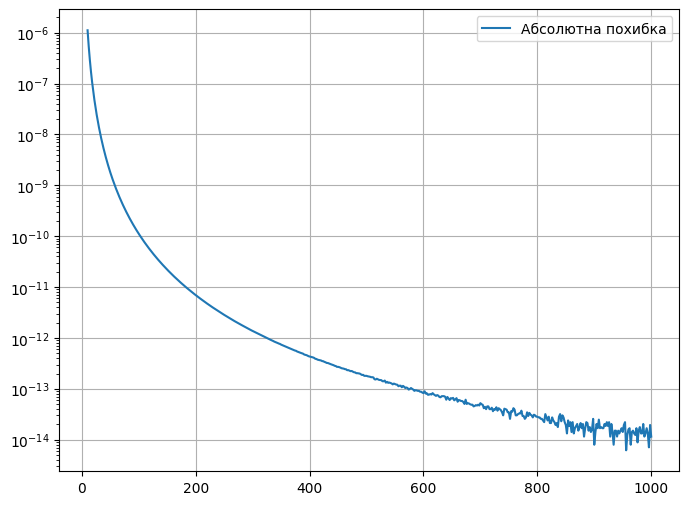

In [88]:
Ns = []
errors = []

for N in range(10, 1001, 2):
    I_approx = simpson(a, b, N)
    err = abs(I_approx - I_exact)
    Ns.append(N)
    errors.append(err)
optimalN = None
for N in range(10, 1001, 2):
    I_approx = simpson(a, b, N)
    if abs(I_approx - I_exact) < 1e-12:
        optimalN = N
        break
if optimalN is None:
    optimalN = 1000

print("Точне значення інтегралу =", I_exact)
print("optimalN =", optimalN, "з похибкою =", abs(simpson(a, b, optimalN) - I_exact))

plt.figure(figsize=(8, 6))
plt.plot(Ns, errors, label="Абсолютна похибка")
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
N0 = optimalN // 10
N0 = N0 - (N0 % 8)
if N0 < 2:
    N0 = 8

I_N0 = simpson(a, b, N0)
error_N0 = abs(I_N0 - I_exact)
print(error_N0)

I_N0_half = I_N0 // 2
I_R = I_N0 + (I_N0 - I_N0_half) / 15
error_R = abs(I_R - I_exact)
print(I_R)
print(error_R)

1.0596222566050528e-08
5.472776134784706
0.2170485190202669


In [90]:
# === Пункт 6: Метод Ейткена ===
I_quarter = simpson(a, b, N0 // 4)

In [91]:
# Формула Ейткена
I_half = simpson(a, b, N0 // 2)
I_E = (I_N0 * I_quarter - I_half ** 2) / (I_N0 + I_quarter - 2 * I_half)
error_E = abs(I_E - I_exact)

In [92]:
# Оцінка порядку точності
numerator = abs(I_quarter - I_half)
denominator = abs(I_half - I_N0)
p_order = math.log(numerator / denominator) / math.log(2) if denominator != 0 else float('inf')

print("\n[Метод Ейткена]")
print("Уточнене значення =", I_E)
print("Похибка =", error_E)
print("Оцінка порядку точності p =", p_order)


[Метод Ейткена]
Уточнене значення = 5.255727617298952
Похибка = 1.534512961143264e-09
Оцінка порядку точності p = 4.001304287537583


In [93]:
# === Пункт 7: Порівняння похибок ===
print("\n[Порівняння методів]")
print(f"Сімпсон (N0={N0}): {error_N0:.2e}")
print(f"Рунге–Ромберг:      {error_R:.2e}")
print(f"Ейткен:             {error_E:.2e}")
print(f"Оцінка порядку p:   {p_order:.2f}")

# === Пункт 8: Адаптивний метод Сімпсона ===

call_counter = 0  # для підрахунку викликів f(x)

def f_counter(x):
    global call_counter
    call_counter += 1
    return f(x)

def adaptive_simpson(f, a, b, eps, max_depth=20):
    def recurse(f, a, b, eps, S, fa, fb, fm, depth):
        c = (a + b) / 2
        h = (b - a) / 2
        fd = f((a + c) / 2)
        fe = f((c + b) / 2)
        S_left = (h / 3) * (fa + 4 * fd + fm)
        S_right = (h / 3) * (fm + 4 * fe + fb)
        if depth <= 0 or abs(S_left + S_right - S) <= 15 * eps:
            return S_left + S_right
        return (
            recurse(f, a, c, eps / 2, S_left, fa, fm, fd, depth - 1) +
            recurse(f, c, b, eps / 2, S_right, fm, fb, fe, depth - 1)
        )

    fa = f(a)
    fb = f(b)
    fm = f((a + b) / 2)
    S = (b - a) / 3 * (fa + 4 * fm + fb)
    return recurse(f, a, b, eps, S, fa, fb, fm, max_depth)

# Обчислення
call_counter = 0
I_adaptive = adaptive_simpson(f_counter, a, b, 1e-12)
error_adaptive = abs(I_adaptive - I_exact)

print("\n[Адаптивний метод Сімпсона]")
print(f"Значення інтегралу = {I_adaptive}")
print(f"Похибка = {error_adaptive:.2e}")
print(f"Кількість викликів f(x) = {call_counter}")



[Порівняння методів]
Сімпсон (N0=32): 1.06e-08
Рунге–Ромберг:      2.17e-01
Ейткен:             1.53e-09
Оцінка порядку p:   4.00

[Адаптивний метод Сімпсона]
Значення інтегралу = 10.511455231529201
Похибка = 5.26e+00
Кількість викликів f(x) = 513
